In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from numpy.random import Generator, MT19937


import time

#Initializing the random number generator
seed = int(time.time()) 
bitgen = MT19937(seed)
rng = Generator(bitgen)  # reproducible generator

In [2]:
def uniform_mc_integrate(f, a, b, N, rng):
    samples = rng.uniform(a, b, N)
    values = f(samples)

    # Variance of the Monte Carlo estimate
    #variance = np.var(values, ddof=0)
    
    variance = np.mean((values - np.mean(values))**2)

    standard_error = np.sqrt(variance) / np.sqrt(N)

    estimate = (b - a) * np.mean(values)

    return estimate, standard_error


In [3]:
'''N= 10000
a = 0
b = 1
f = lambda x: np.exp(x**2)

estimate, variance = uniform_mc_integrate(f, a, b, N)'''

'N= 10000\na = 0\nb = 1\nf = lambda x: np.exp(x**2)\n\nestimate, variance = uniform_mc_integrate(f, a, b, N)'

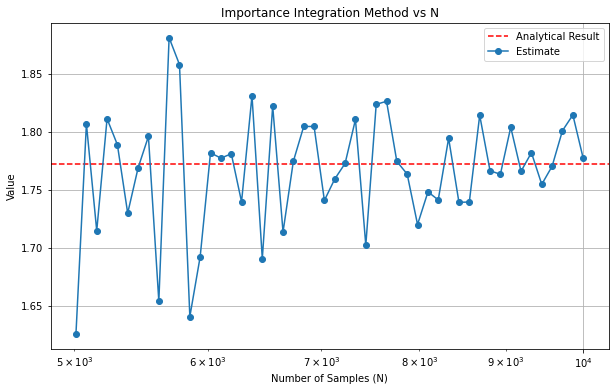

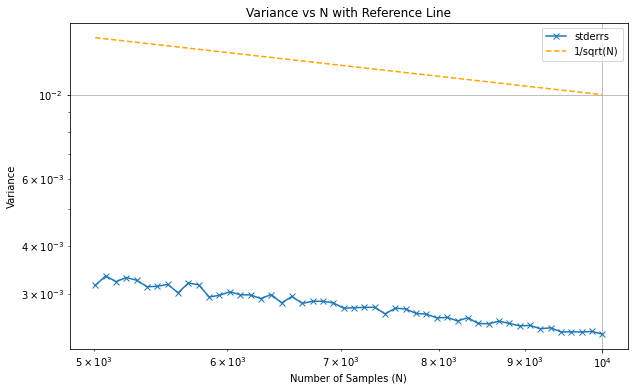

In [4]:
# Define the function f(x) = e^(-x^2)
def f(x):
    return np.exp(-x**2)

a = -10
b = 10


# Define a range of N values
N_values = np.logspace(3.7, 4, num=50, dtype=int)  # N ranges from 10 to 10,000

# Initialize lists to store results
estimates = []
stderrs = []

# Compute the importance integration for each N
for N in N_values:
    estimate, stderr = uniform_mc_integrate(f, a, b, N, rng)
    estimates.append(estimate)
    stderrs.append(stderr)

# Plot the results
plt.figure(figsize=(10, 6))
# Analytical result for the integral of f(x) = e^(-x^2) over the real line
analytical_result = np.sqrt(np.pi)

# Add the analytical result as a horizontal line
plt.axhline(y=analytical_result, color='red', linestyle='--', label='Analytical Result')
plt.plot(N_values, estimates, label='Estimate', marker='o')
plt.xscale('log')
plt.xlabel('Number of Samples (N)')
plt.ylabel('Value')
plt.title('Importance Integration Method vs N')
plt.legend()
plt.grid(True)
plt.show()

# Compute the reference line 1/sqrt(N_values)
reference_line = 1 / np.sqrt(N_values)

# Plot the variance and reference line
plt.figure(figsize=(10, 6))
#plt.plot(N_values, variances, label='Variance', marker='x')
plt.plot(N_values, stderrs, label='stderrs', marker='x')
plt.plot(N_values, reference_line, label='1/sqrt(N)', linestyle='--', color='orange')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Samples (N)')
plt.ylabel('Variance')
plt.title('Variance vs N with Reference Line')
plt.legend()
plt.grid(True)
plt.show()

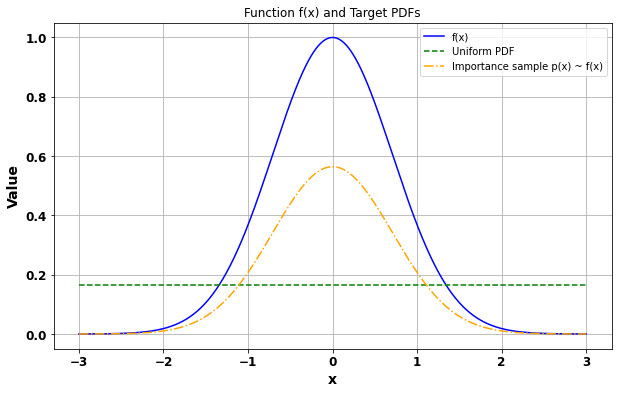

In [8]:
# Define the domain for the function
a=-3
b=3
x = np.linspace(a, b, 1000)

# Compute the function values
f_values = f(x)

# Normalize f(x) to create a probability density function p(x)
p_values = f_values / np.trapz(f_values, x)

# Uniform PDF across the domain
uniform_pdf = np.ones_like(x) / (b - a)

# Plot the function, uniform PDF, and p(x)
plt.figure(figsize=(10, 6))
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('x', fontsize=14, fontweight='bold')
plt.ylabel('Value', fontsize=14, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.plot(x, f_values, label='f(x)', color='blue')
plt.plot(x, uniform_pdf, label='Uniform PDF', color='green', linestyle='--')
plt.plot(x, p_values, label='Importance sample p(x) ~ f(x)', color='orange', linestyle='-.')
plt.xlabel('x')
plt.ylabel('Value')
plt.title('Function f(x) and Target PDFs')
plt.legend()
plt.grid(True)
plt.savefig('Plots/Function_and_Target_PDFs.pdf')
plt.show()